# Explore Weather Trends - Project 1

[Project link](https://colab.research.google.com/drive/17evZQmb5Bsl8Y3QyMIMXZ_rrcBu6xP__?usp=sharing)

## Steps taken to prepare the data

**Part 1 - Extracting from SQL Database**

1. Find my closest city from the city_list using this query:
```sql
SELECT * FROM city_list
WHERE country = 'United States'
```
2. Extract the temperature data for Washington
```sql
SELECT cl.city, year, avg_temp  
FROM city_list cl
JOIN city_data cd ON cl.city = cd.city
WHERE cl.city = 'Washington'
```
3. Extract the global data
```sql
SELECT * FROM global_data
```

**Part 2 - Read data and Create visualization with Pandas and Matplotlib**

1. Import neccessary packages 
2. Read the csv files and convert them to pandas DataFrame
3. Inspect, check and deal with NaNs
> There are 5 missing data in Washington. I chose to fill with the closest 10 year value. 
4. Prepare the variables for plotting
> I was getting errors initially since both data sets have different length. To work around this, I decided to plot within the "*middle ground years*" of both data sets. I found this by getting the minimum and maximum years in both data sets and only plot within this "*middle ground years*". Then I set the index for both data sets as year, then set my year variable to the "middle ground year" values.
5. Create a line plot to compare both data sets



### Part 2 as follows

In [ ]:
# imports and read csv to pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

# read csv to pandas
global_temp = pd.read_csv('global_data.csv')
wash_temp = pd.read_csv('washington_temp.csv')

In [ ]:
# check if wash temp has any NaNs
wash_temp.isnull().any()

In [ ]:
# which rows has nulls
null_rows = wash_temp[wash_temp['avg_temp'].isnull()].index.tolist()
null_rows

In [ ]:
# fill in NaNs with value of nearest 10 year mean

# for rows [3, 4, 5, 6]
wash_temp['avg_temp'] = wash_temp['avg_temp'].fillna(value=wash_temp.loc[0:10]['avg_temp'].mean(), limit=4)

# for row [37]
wash_temp['avg_temp'] = wash_temp['avg_temp'].fillna(value=wash_temp.loc[30:40]['avg_temp'].mean(), limit=1)

In [ ]:
# check the replaced NaN values
print(wash_temp.loc[3:6]['avg_temp']) 
print(wash_temp.loc[37]['avg_temp']) 

In [ ]:
# check if any null data
global_temp.isnull().any()

In [ ]:
# Get the 10 year rolling average for Washington temp
wash_temp['MA10'] = wash_temp['avg_temp'].rolling(10, min_periods=1).mean()
wash_temp.head(10)

In [ ]:
# Get the 10 year rolling average for Global temp
global_temp['MA10'] = global_temp['avg_temp'].rolling(10, min_periods=1).mean()

# see first 3 rows
global_temp.head(3)

In [ ]:
# assign variables for plotting
washMA10 = wash_temp['MA10']
globalMA10 = global_temp['MA10']

# Since global and washington data are different lengths
# I'll compare the same slice of years from Washington and Global data
# I'll find the middle years for fair comparison
print('Min and Max year for Washington ', min(wash_temp['year']), max(wash_temp['year']))
print('Min and Max year for Global Temp ',min(global_temp['year']), max(global_temp['year']))
print('\nFor comparison, need to start at ' + str(min(global_temp['year'])) + '\nAnd end at ' + str(max(wash_temp['year'])))

# see first 3 rows
global_temp.head(3)

In [ ]:
# assign year as index
wash_temp = wash_temp.set_index('year')

# see first 3 rows
wash_temp.head(3)

In [ ]:
# assign year as index 
global_temp = global_temp.set_index('year')

# check index, see first 3 rows
global_temp.head(3)

In [ ]:
# get values of global_temp MA10 from 1750 to 2013
# global and washington temp need to have same length for comparison
global_MA10 = global_temp.loc[1750:2013]['MA10'].values
global_MA10.shape

In [ ]:
# get values of wash_temp MA10 from 1750 to 2013
# global and washington temp need to have same length for comparison
wash_MA10 = wash_temp.loc[1750:2013]['MA10'].values
wash_MA10.shape

In [ ]:
# get correct length of years 1750 to 2013
years = global_temp.loc[1750:2013].index

# make sure its same shape
years.shape

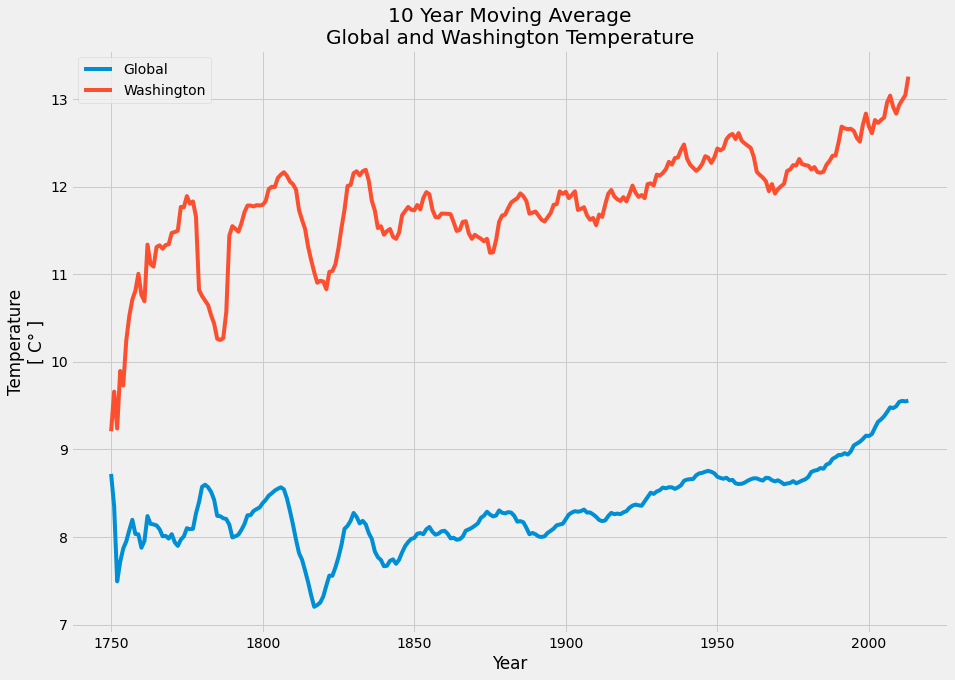

In [ ]:
# Create Plot

fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(years,global_MA10, label = "Global")
ax.plot(years, wash_MA10, label = "Washington")

ax.set(title = "10 Year Moving Average\nGlobal and Washington Temperature",
       xlabel = "Year",
       ylabel = "Temperature\n[ C° ]")

plt.legend()
plt.show()

fig.savefig('global_washington_ma10.png', bbox_inches='tight')

In [ ]:
wa = round(wash_temp.loc[1750:2013]['avg_temp'].mean(),2)
gl = round(global_temp.loc[1750:2013]['avg_temp'].mean(),2) 
# Washington average temperature from 1750 to 2013
print('Washington Mean : ', wa)
# Global average temperature from 1750 to 2013
print('Global Mean : ', gl)
# Washington and Global difference
print('Washington and Global difference in Mean Temperature : ', round(wa - gl,2))
# Median Temperature
print()
wa_median = np.median(wash_temp.loc[1750:2013]['avg_temp'])
gl_median = np.median(global_temp.loc[1750:2013]['avg_temp'])
print('Washington Median Temp : ', round(wa_median,2))
print('Global Median Temp : ', round(gl_median,2))

* Overall in average, **Washington is 3.52 C° warmer** at 11.88 C° **compared to the global average** of 8.36 C°. The median temp in Washington is 11.92 C° while the global median is same as the mean at 8.36 C°.

In [ ]:
print('Washington\'s')
print(round(wash_temp.loc[1750:2013]['avg_temp'].describe(),2))
print('\nGlobal\'s')
print(round(global_temp.loc[1750:2013]['avg_temp'].describe(),2))
print()
print('Year of min avg temp in Washington : ', wash_temp.loc[1750:2013]['avg_temp'].idxmin())
print('Year of max avg temp in Washington : ', wash_temp.loc[1750:2013]['avg_temp'].idxmax())
print()
print('Year of min avg temp Globally  : ', global_temp.loc[1750:2013]['avg_temp'].idxmin())
print('Year of max avg temp Globally : ', global_temp.loc[1750:2013]['avg_temp'].idxmax())

* Washington's temperature ranged from **coldest 3.15 C°** a which is a one-time occurence in 1779 and **warmest at 14.19** C° in 2013. Its **standard deviation is 1.03 C°** which means that we can expect that in average, Washington's temperature to **fall within 1.03 C° of the mean temperature of 11.88 C°**.

* Global temperature is more consistent with a standard deviation of **0.58 C°**. The **coldest temperature is 5.78 C°** in 1752  and **warmest at 9.73 C°** in 2007. Global temperature can be expected to **fall within 0.58 C° of the mean temperature of 8.36 C°**. 

In [ ]:
# Get the mean temperature every 5 years
g = np.array(global_temp.loc[1751:2010]['avg_temp']).reshape(-1,5)
gl_mean_of_avg_temp = np.mean(g, axis=1)

w = np.array(wash_temp.loc[1751:2010]['avg_temp']).reshape(-1,5)
wa_mean_of_avg_temp = np.mean(w, axis=1)

wash_gl_diff = wa_mean_of_avg_temp - gl_mean_of_avg_temp
time_period = ((np.arange(1,54)) * 5) + 1750

def average_temp_every_5yr(period,avg_temp1,avg_temp2):
    avg_temp_5 = list(zip(period,avg_temp1,avg_temp2))
    df = pd.DataFrame(avg_temp_5, columns = ['Period','Washington','Global'])
    return df.set_index('Period')

print('Average Temperatures Every 5 Years\n')
average_temp_every_5yr(time_period,wa_mean_of_avg_temp,gl_mean_of_avg_temp)

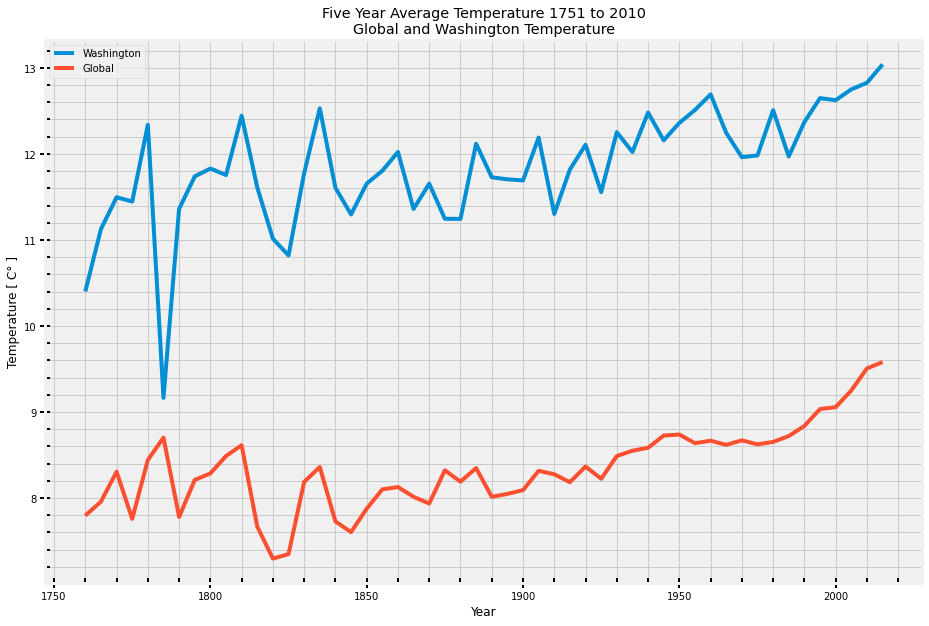

In [ ]:
# Create a plot
df = average_temp_every_5yr(time_period,wa_mean_of_avg_temp,gl_mean_of_avg_temp)

fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_period[1:], df['Washington'], label = "Washington")
ax.plot(time_period[1:], df['Global'], label = "Global")

ax.set(title = "Five Year Average Temperature 1751 to 2010\nGlobal and Washington Temperature",
       xlabel = "Year",
       ylabel = "Temperature [ C° ]")

ax.minorticks_on()
ax.tick_params(which='major', length=10, width=2, direction='inout')
ax.tick_params(which='minor', length=5, width=2, direction='in')
ax.grid(which='minor')

plt.legend()
plt.show()

fig.savefig('global_washington_percent_change.png', bbox_inches='tight')

>The huge spike in Washington's Temperature from 1780 to 1790 can be misleading, because these values are NaNs before being filled by the nearest 10 year data set. 

* Beginning from **1751 to 1850**, **Global** temperature had variability in the **range of 0.6 C° to 1.4 C°**. In **Washinton** starting from 1800 had variability of in the **range of 0.6 C° to 1.8 C°**. 

* **After 1850**, **Global** temperature has seen **smaller changes from 0.4 C° to 0.6 C°**. But in **1930 Global** temperature has seen a **steady climb** from 8.5 C° up to 9.5 C° by 2013.

* **After 1850**, In **Washington** temperature is **more varied from 0.6 C° to 1.0 C° range**. **Starting from 1930**, Washington's temperature has been **near or above 12 C°** and warmest at **14.19 C°** in **2013**.    